In [1]:
!pip install fastai torch --upgrade

!pip install -Uqq fastbook
!pip install fastcore --upgrade

import fastbook
fastbook.setup_book()

In [2]:
import fastbook
import fastcore

from fastbook import *
from fastai.vision import *
from fastai.metrics import error_rate

def init_sample_mnist():
  return untar_data(URLs.MNIST)

path = init_sample_mnist()

In [3]:
def get_mnist_dls(): 
  mnist_full = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
                        get_items=get_image_files_sorted,
                        splitter=RandomSplitter(),
                        get_y=parent_label)

  return mnist_full.dataloaders(path)

dls = get_mnist_dls()

# dls.show_batch(max_n=9, figsize=(6,6))

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.0006918309954926372)

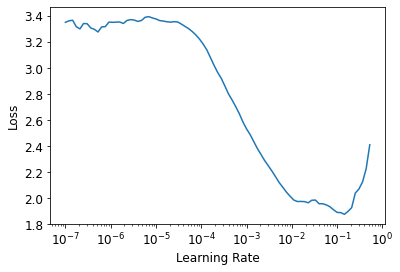

In [7]:
learn_net18 = cnn_learner(dls, 
                    models.resnet18, 
                    pretrained=False,
                    loss_func=CrossEntropyLossFlat(),
                    ps=0.25,
                    metrics=error_rate)

learn_net18.lr_find()

epoch,train_loss,valid_loss,error_rate,time
0,0.196542,0.228430,0.068571,00:40
1,0.094230,0.075795,0.022643,00:40
2,0.050118,0.048139,0.015214,00:40
3,0.027369,0.035264,0.010000,00:39
4,0.018218,0.023872,0.007286,00:40
5,0.007323,0.022099,0.006357,00:40


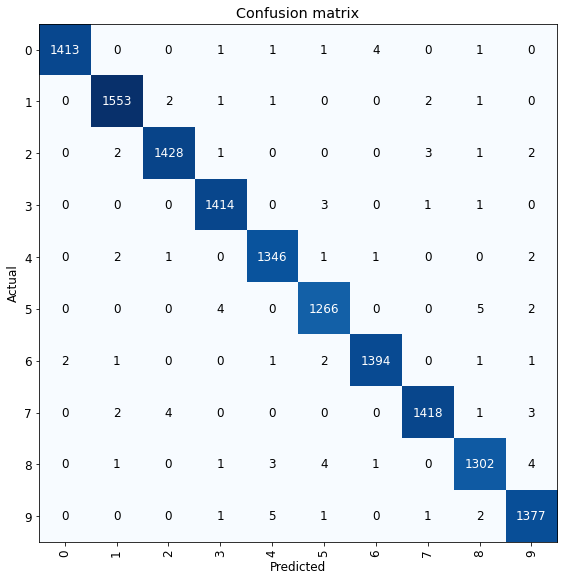

In [8]:
lr_min = 0.014454397559165954
lr_steep = 0.0006918309954926372
learn_net18.fit_one_cycle(6, slice(lr_min,lr_steep))

interp_net18 = ClassificationInterpretation.from_learner(learn_net18)
interp_net18.plot_confusion_matrix(figsize=(8,8))

In [9]:
learn_net18.export('pkl/cnn_adam.pkl')